# Day 25

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(889, 12)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [5]:
df.pop('Cabin')

0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
          ...     
859            NaN
860            D17
861            NaN
862            NaN
863            NaN
864            NaN
865            A24
866            NaN
867            NaN
868            NaN
869            D35
870    B51 B53 B55
871            NaN
872            NaN
873            NaN
874            NaN
875            NaN
876            NaN
877            C50
878            NaN
879            NaN
880         

In [6]:
df.shape

(889, 11)

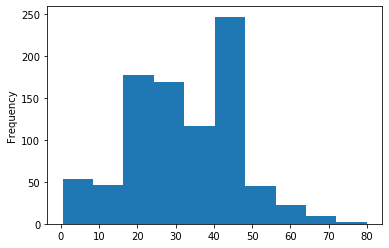

In [7]:
df['Age'].plot.hist()

In [8]:
df['Age'].fillna(df['Age'].mean(), inplace= True)

In [9]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
df["Embarked"].fillna(value='S',inplace=True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [15]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

df["Sex"] = lab.fit_transform(df["Sex"])
df["Embarked"] = lab.fit_transform(df["Embarked"])

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [17]:
eda =  pd.read_csv('train.csv')

In [18]:
eda.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


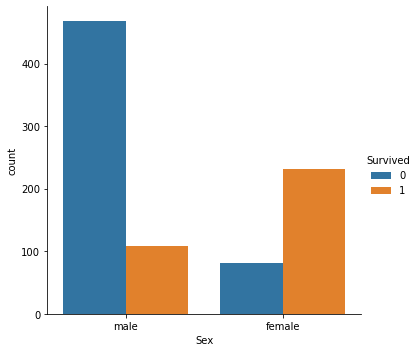

In [19]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = eda)

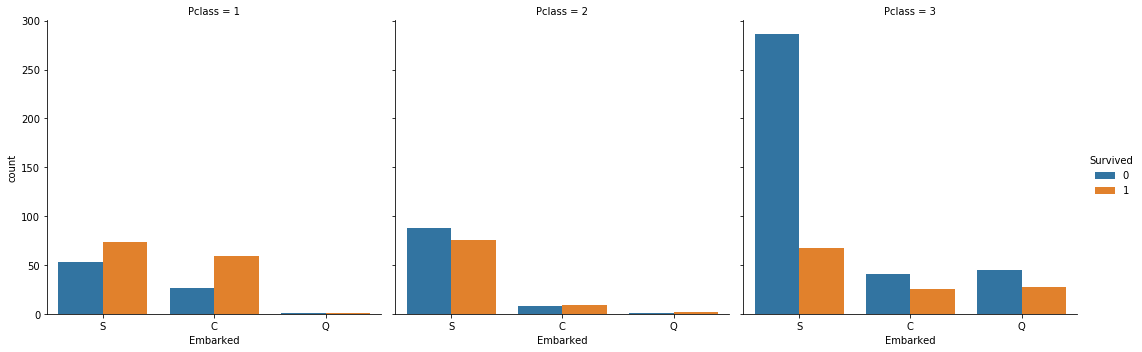

In [20]:
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data =eda)

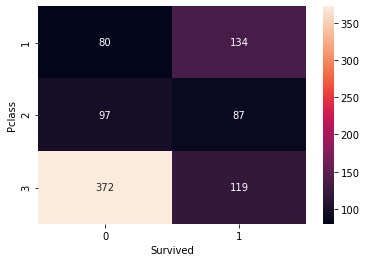

In [21]:
# Group the dataset by Pclass and Survived and then unstack them 

group = eda.groupby(['Pclass', 'Survived']) 
pclass_survived = group.size().unstack() 

# Heatmap - Color encoded 2D representation of data. 

sns.heatmap(pclass_survived, annot = True, fmt ="d")

In [23]:
#class 1 has highest survival rate

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import * 
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
def prediction(col):
    
    clf = BernoulliNB()

    for i in col:
        x = df.drop([i], axis=1)
        print("--------------------------------------------------------------------------------------")
        print(f"Here Dependent Variable is {i} & remaining are Independent Variables")
        print("x :\n", x.head())
        y = df[i]
        print("\ny:\n", y.head())
    
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0)
        model = clf.fit(x_train,y_train)
        pred = model.predict(x_test)
    
        print(f"\nAcuuracy for {i} is: ", accuracy_score(y_test, pred, normalize=True))
        print(f"Confusion matrix for {i} is \n", confusion_matrix(y_test, pred))

column = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked']        
prediction(column)

--------------------------------------------------------------------------------------
Here Dependent Variable is Survived & remaining are Independent Variables
x :
    Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500         2
1       1    0  38.0      1      0  71.2833         0
2       3    0  26.0      0      0   7.9250         2
3       1    0  35.0      1      0  53.1000         2
4       3    1  35.0      0      0   8.0500         2

y:
 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Acuuracy for Survived is:  0.7715355805243446
Confusion matrix for Survived is 
 [[131  26]
 [ 35  75]]
--------------------------------------------------------------------------------------
Here Dependent Variable is Pclass & remaining are Independent Variables
x :
    Survived  Sex   Age  SibSp  Parch     Fare  Embarked
0         0    1  22.0      1      0   7.2500         2
1         1    0  38.0      1      0  71.2833         0
2   

In [26]:
score = {'Dependent Variable': ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked'],
         'Accuracy Score': [0.7835,0.5932,0.7835,0.6791,0.7425,0.6977],
         'Total ':[268,268,268,268,268,268],
         'Correct Prediction':[210,159,210,182,199,187],
         'Incorrect Prediction':[58,109,58,86,69,81]}
score = pd.DataFrame(score)
score

,Dependent Variable,Accuracy Score,Total,Correct Prediction,Incorrect Prediction
0,Survived,0.7835,268,210,58
1,Pclass,0.5932,268,159,109
2,Sex,0.7835,268,210,58
3,SibSp,0.6791,268,182,86
4,Parch,0.7425,268,199,69
5,Embarked,0.6977,268,187,81


In [27]:
#The Survived and Gender column with same accuarcy
#Pclass with the least accuracy